<a href="https://colab.research.google.com/github/crazat/crazat.githurb.io/blob/main/%EC%95%99%EC%83%81%EB%B8%94_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 코랩에서 matplotlib 이용할때 한글 깨짐 현상 해결방법
    - 세션 다시시작을 하지 않아도 됨
    - 세션 다시시작을 하지 않아도 한글 깨짐을 방지하도록 수정하였음

In [ ]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,156 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124935 files and dire

- 와인 품질 분류 데이터셋 다운로드 받아 구글드라이브에 올리기
    - 학습세트: https://drive.google.com/file/d/1WmWMtjOfBoxX63BKHSgaGKEhUSlNBz2d/view?usp=sharing
    - 평가세트: https://drive.google.com/file/d/1uePOZSwLSMcOjbXvIDnHasPoLB-6Oc4a/view?usp=sharing

- 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 데이터 경로 변수

In [ ]:
DATA_PATH = "/content/drive/MyDrive/머신러닝/data/"
DATA_PATH

'/content/drive/MyDrive/머신러닝/data/'

- 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv(f"{DATA_PATH}winequality_train.csv") # 학습데이터
test = pd.read_csv(f"{DATA_PATH}winequality_test.csv") # 테스트 데이터
train.shape , test.shape

((5197, 13), (1300, 12))

- 와인 품질 분류 데이터셋 설명
    - 와인 정보를 바탕으로 품질을 분류하는 다중 분류 문제(Multi-Class)
    - 품질 컬럼이 타겟인데 0~5 등급으로 레이블 인코딩 되어 있고 높을수록 품질이 좋음
    - 평가 지표 Accuracy

In [ ]:
train.head()

,산도,휘발성산,시트르산,잔당,염화물,독립이산화황,총이산화황,밀도,수소이온농도,황산염,도수,종류,품질
0,6.8,0.30,0.27,11.6,0.028,22.0,97.0,0.99314,2.96,0.38,11.7,white,3
1,7.2,0.50,0.00,0.8,0.034,46.0,114.0,0.99320,3.19,0.34,9.2,white,1
2,6.6,0.54,0.21,16.3,0.055,41.0,182.0,0.99860,3.35,0.54,10.4,white,3
3,7.5,0.29,0.67,8.1,0.037,53.0,166.0,0.99660,2.90,0.41,8.9,white,3
4,6.5,0.17,0.33,1.4,0.028,14.0,99.0,0.99280,3.23,0.55,10.1,white,3


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   산도      5197 non-null   float64
 1   휘발성산    5197 non-null   float64
 2   시트르산    5197 non-null   float64
 3   잔당      5197 non-null   float64
 4   염화물     5197 non-null   float64
 5   독립이산화황  5197 non-null   float64
 6   총이산화황   5197 non-null   float64
 7   밀도      5197 non-null   float64
 8   수소이온농도  5197 non-null   float64
 9   황산염     5197 non-null   float64
 10  도수      5197 non-null   float64
 11  종류      5197 non-null   object 
 12  품질      5197 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 527.9+ KB


- 타겟 비율 확인하기

In [ ]:
train["품질"].value_counts(normalize=True)

,proportion
품질,
3,0.436598
2,0.329036
4,0.166057
1,0.033288
5,0.030402
0,0.004618


- 특성으로 사용할 변수 추가하기

In [ ]:
cols = ['산도', '휘발성산', '시트르산', '잔당', '염화물', '독립이산화황', '총이산화황', '밀도', '수소이온농도','황산염', '도수']
train_ft = train[cols].copy()
test_ft = test[cols].copy()

- 범주형 컬럼 고유값 개수 확인

In [ ]:
train["종류"].value_counts()

,count
종류,
white,3924
red,1273


- 종류 컬럼 0과1로 인코딩하여 피쳐추가

In [ ]:
# red 와인일경우 1 아닐경우 0
train_ft["종류"] = train["종류"].map(lambda x : int(x == "red") )
test_ft["종류"] = test["종류"].map(lambda x : int(x == "red") )

- Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_ft)

MinMaxScaler()

In [ ]:
train_ft[train_ft.columns] = scaler.transform(train_ft) # 학습 데이터
train_ft.head()

,산도,휘발성산,시트르산,잔당,염화물,독립이산화황,총이산화황,밀도,수소이온농도,황산염,도수,종류
0,0.222222,0.146667,0.162651,0.168712,0.026711,0.072917,0.209677,0.116252,0.186047,0.087209,0.536232,0.0
1,0.256410,0.280000,0.000000,0.003067,0.036728,0.156250,0.248848,0.117409,0.364341,0.063953,0.173913,0.0
2,0.205128,0.306667,0.126506,0.240798,0.071786,0.138889,0.405530,0.221515,0.488372,0.180233,0.347826,0.0
3,0.282051,0.140000,0.403614,0.115031,0.041736,0.180556,0.368664,0.182957,0.139535,0.104651,0.130435,0.0
4,0.196581,0.060000,0.198795,0.012270,0.026711,0.045139,0.214286,0.109697,0.395349,0.186047,0.304348,0.0


In [ ]:
test_ft[test_ft.columns] = scaler.transform(test_ft) # 테스트 데이터
test_ft.head()

,산도,휘발성산,시트르산,잔당,염화물,독립이산화황,총이산화황,밀도,수소이온농도,황산염,도수,종류
0,0.273504,0.153333,0.168675,0.015337,0.063439,0.111111,0.301843,0.111625,0.457364,0.191860,0.362319,0.0
1,0.487179,0.440000,0.114458,0.079755,0.165275,0.111111,0.161290,0.224986,0.325581,0.186047,0.202899,1.0
2,0.341880,0.346667,0.102410,0.026074,0.100167,0.034722,0.154378,0.177174,0.372093,0.127907,0.188406,1.0
3,0.307692,0.046667,0.144578,0.108896,0.058431,0.069444,0.211982,0.154039,0.170543,0.046512,0.231884,0.0
4,0.222222,0.133333,0.265060,0.167178,0.046745,0.197917,0.500000,0.188741,0.387597,0.191860,0.217391,0.0


- 정답 데이터

In [ ]:
target = train["품질"]
target

,품질
0,3
1,1
2,3
3,3
4,3
...,...
5192,2
5193,2
5194,3
5195,3


# 앙상블 학습(Ensemble Learning)
- 기계학습에서 여러개의 개별모델의 예측을 결합함으로써 보다 정확한 예측을 도출하는 기법
- 모델별로 편향성은 존재할수 밖에 없다. 앙상블을 통해 보완함으로써 성능 향상
- 앙상블 학습의 유형
    - 보팅(Voting), 스태킹(Stacking), 배깅(Bagging), 부스팅(Boosting)

## Voting
- 여러 모델들의 예측값을 투표방식(hard) or 평균방식(soft) 으로 앙상블
- 분류, 회귀 모두 사용가능
    

In [ ]:
# cv 객체 생성
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

In [ ]:
# 모델
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

- VotingClassifier 주요 파라미터
    - estimators
        - 모델 객체를 리스트에 담아 전달하면 된다.
    - voting
        - 'hard'(default) , 'soft'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

# 별칭과 모델 객체를 튜플에 담아서 리스트에 넣음
estimators = [

              ("knn",KNeighborsClassifier() ),
              ("lr",LogisticRegression(random_state=42)),
              ("dt",DecisionTreeClassifier(random_state=42)),
]

# 딕셔너리를 언패킹하여 키워드 아규먼트 전달 방식
params ={
    "estimators" : estimators, # 모델 담은 리스트
    "voting" : "soft" , # soft 는 각 모델의 예측확률 평균
    "n_jobs" : -1
}

model = VotingClassifier(**params)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='accuracy',n_jobs = -1)
print(scores) # 폴드별 검증점수 리스트
np.mean(scores) # cv 평균 점수

[0.61346154 0.58846154 0.60635226 0.5919153  0.60057748]


0.6001536240467906

In [ ]:
params ={
    "estimators" : estimators, # 모델 담은 리스트
    "voting" : "hard" , # hard 는 과반수 투표
    "n_jobs" : -1
}

model = VotingClassifier(**params)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='accuracy',n_jobs = -1)
print(scores) # 폴드별 검증점수 리스트
np.mean(scores) # cv 평균 점수

[0.59519231 0.60192308 0.59769009 0.5813282  0.59384023]


0.5939947804841934

- hard 방식으로 학습후 테스트셋 예측해보기

In [ ]:
params ={
    "estimators" : estimators, # 모델 담은 리스트
    "voting" : "hard" , # hard 는 과반수 투표
    "n_jobs" : -1
}

model = VotingClassifier(**params)
model.fit(train_ft,target)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 n_jobs=-1)

In [ ]:
pred = model.predict(test_ft)
pred

array([3, 2, 2, ..., 3, 3, 3])

- hard 방식에서는 predict_proba 사용 불가

In [ ]:
# model.predict_proba(test_ft)

## Stacking
- 여러 모델들의 예측 결과를 학습 데이터로 만들어서 다시 별도의 최종 모델(메타 모델)로 재 학습시켜 예측하는 방식​
- 과적합 방지를 위해 내부적으로 각모델별로 CV 를 진행한다.
- 분류, 회귀 모두 사용가능
- StackingClassifier 주요 파라미터
    - estimators
        - 모델 객체를 리스트에 담아 전달하면 된다.
    - final_estimator
        - 메타 모델 객체 전달
    - cv
        - 정수(fold 수) 혹은 cv 객체 전달

In [ ]:
estimators

[('knn', KNeighborsClassifier()),
 ('lr', LogisticRegression(random_state=42)),
 ('dt', DecisionTreeClassifier(random_state=42))]

In [ ]:
from sklearn.ensemble import StackingClassifier

# 딕셔너리를 언패킹하여 키워드 아규먼트 전달 방식
params ={
    "estimators" : estimators, # 모델 담은 리스트
    "final_estimator" : LogisticRegression(random_state=42,max_iter=500) , # 메타 모델
    "cv" : cv, # cv 객체
    "n_jobs" : -1
}

model = StackingClassifier(**params)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='accuracy',n_jobs = -1)
print(scores) # 폴드별 검증점수 리스트
np.mean(scores) # cv 평균 점수

[0.63269231 0.60865385 0.63041386 0.61116458 0.61116458]


0.6188178351965647

- 학습후 테스트셋 예측해보기

In [ ]:
model = StackingClassifier(**params)
model.fit(train_ft,target)
pred = model.predict(test_ft)
pred

array([3, 2, 2, ..., 3, 3, 3])

## Bagging
- Bootstrap aggregating의 약자로 Bootstrap sampling 기법을 이용해 학습데이터를 여러 번 뽑아 각 모델에 학습시켜 예측 결과의 최빈값 또는 평균으로 예측하는 방식
- Bootstrap sampling
    - 크기가 n인 학습데이터가 주어졌을 때 하나의 샘플이 나올 확률은 1/n 으로 하고 랜덤하게 샘플들을 뽑아 새로운 학습데이터를 여러 개 만드는 기법으로 한 번 뽑힌 샘플을 복원하여 다시 뽑는 복원 추출법이 사용
- 분류, 회귀 모두 사용가능
- BaggingClassifier 주요 파라미터
    - random_state
        - 시드값
    - estimator
        - 모델 객체를 전달하면 된다.
        - 기본값은 None이며 tree 모델이 선택된다.
        - 1.2 버전부터 estimator 로 변경됨
    - n_estimators
        - base 모델 개수(Bootstrap sampling 수)
        - 기본값은 10
    - max_samples
        - 각 모델이 학습시 사용할 샘플 개수
        - int(개수) or float(비율) 형으로 주면 된다. 기본값 1.0
    - max_features
        - 각 모델이 학습시 사용할 피쳐 개수
        - int(개수) or float(비율) 형으로 주면 된다. 기본값 1.0
    - bootstrap_features
        - 각 모델별로 피쳐를 다르게 할지 여부
        - bool 자료형을 넣으면 되고 기본값은 False

In [ ]:
import sklearn
sklearn.__version__

'1.6.1'

In [ ]:
from sklearn.ensemble import BaggingClassifier

params ={
    "random_state" : 42,
    "estimator" : LogisticRegression(random_state=42) , # None 이면 결정트리 사용함
    'n_estimators':10, # base estimators 개수
    "n_jobs" : -1
}
model = BaggingClassifier(**params)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='accuracy',n_jobs = -1)
print(scores) # 폴드별 검증점수 리스트
np.mean(scores) # cv 평균 점수

[0.54326923 0.54230769 0.55245428 0.53031761 0.5466795 ]


0.5430056637299178

- 학습후 테스트셋 예측해보기

In [ ]:
model = BaggingClassifier(**params)
model.fit(train_ft,target)
pred = model.predict(test_ft)
pred

array([3, 2, 2, ..., 3, 2, 2])

## Random Forest
- 다수의 결정 트리 모델이 학습데이터에서 **배깅 방식**으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 앙상블 하는 모델
- 각 결정 트리 모델의 예측 결과의 상관 관계를 줄이고 다양성을 주기위해 전체 특성을 사용하지 않고 각 트리별로 랜덤하게 m개의 특성을 선택하여 학습
- 분류, 회귀 모두 사용가능
- RandomForestClassifier 주요 파라미터
    - random_state
        - 시드값
    - n_estimators
        - tree 모델 개수(Bootstrap sampling 수)
        - 기본값은 100
    - max_samples
        - 각 트리모델이 학습시 사용할 샘플 개수
        - int(개수) or float(비율) 형으로 주면 된다. 기본값 None(전체샘플수)
    - 트리모델에 있는 하이퍼파라미터를 그대로 사용가능하다.
        - min_samples_split , max_depth , min_samples_split , max_features, max_leaf_nodes

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params ={
    "random_state" : 42,
    'n_estimators':80, # 트리 개수
    'min_samples_split':4, # 노드를 분할하는데 필요한 최소 샘플수
    "n_jobs" : -1
}
model = RandomForestClassifier(**params)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='accuracy',n_jobs = -1)
print(scores) # 폴드별 검증점수 리스트
np.mean(scores) # cv 평균 점수

[0.67980769 0.67788462 0.67372474 0.64773821 0.65640038]


0.6671111275634857

- 학습후 테스트셋 예측해보기

In [ ]:
model = RandomForestClassifier(**params)
model.fit(train_ft,target)
pred = model.predict(test_ft)
pred

array([3, 2, 2, ..., 3, 3, 3])

- 피쳐 중요도
    - 트리기반 알고리즘들은 학습된 모델객체의 피쳐 중요도를 볼수있는 인스턴스변수가 있다.

In [ ]:
model.feature_importances_

array([0.07420134, 0.10090082, 0.07816392, 0.08535679, 0.0848398 ,
       0.08559522, 0.08884046, 0.1030479 , 0.08091284, 0.0847947 ,
       0.12978517, 0.00356103])

## Gradient Boosting
- 트리 기반의 Boosting 계열의 앙상블 모델
- 부스팅(Boosting)
    - 여러 개의 약한 학습기를 순차적으로 학습하면서 약한 학습기들을 결합하여 강한 분류기를 만드는 과정
- 분류, 회귀 모두 사용가능
- 데이터가 적으면 과적합이 발생한다.
- GradientBoostingClassifier 주요 파라미터
    - random_state
        - 시드값
    - n_estimators
        - 부스팅 단계수
        - 기본값은 100
    - learning_rate
        - 학습률로 부스팅 과정에서 각 트리의 기여도
        - 기본값은 0.1로 0~1 사이의 값을 넣어야함
    - 트리모델에 있는 하이퍼파라미터를 그대로 사용가능하다.
        - min_samples_split , max_depth , min_samples_split , max_features, max_leaf_nodes

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

params ={
    "random_state" : 42,
    'n_estimators': 100, # 수행할 부스팅 단계의 수
    "learning_rate": 0.5 # 학습률
}
model = GradientBoostingClassifier(**params)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='accuracy',n_jobs = -1)
print(scores) # 폴드별 검증점수 리스트
np.mean(scores) # cv 평균 점수

[0.62019231 0.61442308 0.61501444 0.59095284 0.58710298]


0.605537128896128

### Gradient Boosting의 학습및 예측 방식에 대한 이해
- 이전 학습기에서 발생한 잔여 오차(residual error)를 y값으로 하여 새로운 학습기로 학습을 시키는 방식
- 최종적으로 모든 학습기를 결합하여 예측

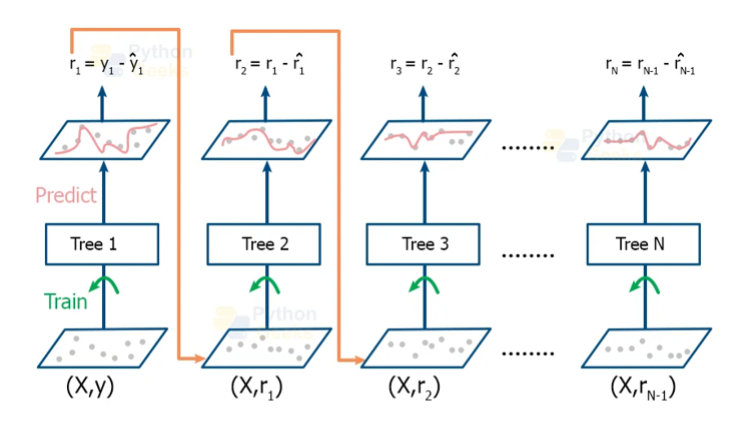

- 회귀 문제에서 확인해보기
    - 트리 모델을 이용하여 Gradient Boosting방식으로 학습
    - GradientBoosting 모델을 이용하여 학습
    - 검증셋에 각각 예측하여 RMSE 평가 결과가 같은지 확인

In [ ]:
from sklearn.tree import DecisionTreeRegressor # 트리 회귀
from sklearn.ensemble import GradientBoostingRegressor # gbm 회귀
from sklearn.metrics import mean_squared_error # mse

- 사이킷런에서 제공해주는 데이터셋
    - 당뇨병 진행도 예측 데이터셋 받아오기

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes() # 데이터셋 받아오기
x = diabetes.data # 학습데이터
y = diabetes.target # 정답데이터
x.shape, y.shape

((442, 10), (442,))

- holdout 으로 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state=42)
x_train.shape , x_valid.shape , y_train.mean() , y_valid.mean()

((331, 10), (111, 10), 154.34441087613294, 145.54054054054055)

- 트리모델 하이퍼파라미터

In [ ]:
hp = {
   "max_depth" : 2,
   "random_state" : 42
}

#### 트리모델을 이용하여 Gradient Boosting방식으로 학습

- 1단계: 실제값을 타겟으로 하여 학습

In [ ]:
weak_1 = DecisionTreeRegressor(**hp)
weak_1.fit(x_train, y_train)
pred = weak_1.predict(x_train) # 오차를 구하기 위해 학습데이터로 예측

- 2단계: 실제값과 이전단계 예측값의 차이를 타겟으로 하여 학습

In [ ]:
residual = y_train - pred # 오차 구하기
weak_2 = DecisionTreeRegressor(**hp)
weak_2.fit(x_train, residual) # 오차를 타겟으로 설정
pred = weak_2.predict(x_train) # 오차를 구하기 위해 학습데이터로 예측

- 3단계: 이전단계 타겟값과 이전단계 예측값의 차이를 타겟으로 하여 학습

In [ ]:
residual = residual - pred # 오차 구하기
weak_3 = DecisionTreeRegressor(**hp)
weak_3.fit(x_train, residual) # 오차를 타겟으로 설정

DecisionTreeRegressor(max_depth=2, random_state=42)

- 검증셋에 대하여 평가해보기
    - 부스팅 단계에서 생성된 모델들의 예측값의 합을 최종 예측값으로 한다.(결합)

In [ ]:
pred = weak_1.predict(x_valid) + weak_2.predict(x_valid) + weak_3.predict(x_valid)
mean_squared_error(y_valid, pred) ** 0.5 # rmse

61.03724125099467

#### Gradient Boosting 모델 학습

In [ ]:
hp

{'max_depth': 2, 'random_state': 42}

In [ ]:
hp["n_estimators"] = 3 # 수행할 부스팅 단계의 수
hp["learning_rate"] = 1.0 # 학습률

In [ ]:
hp

{'max_depth': 2, 'random_state': 42, 'n_estimators': 3, 'learning_rate': 1.0}

In [ ]:
gbr = GradientBoostingRegressor(**hp)
gbr.fit(x_train, y_train)
pred = gbr.predict(x_valid)

mean_squared_error(y_valid, pred) ** 0.5 # rmse

61.03724125099466

## XGBoost(eXtra Gradient Boost)
- GBM의 느린 수행시간을 개선하고 과적합 규제 등 다양한 기능이 지원되는 GBM 기반 라이브러리
- 머신러닝 과제에서 뛰어난 예측 성능을 보임
- tree 기반의 앙상블 학습에서 각광받는 알고리즘
- 분류, 회귀 모두 사용가능
- XGBoost는 사이킷런과 연동되는 모듈을 지원한다.
- https://xgboost.readthedocs.io/en/stable/
- 주피터 노트북 환경에서 설치 방법
```python
!pip install xgboost
```
- XGBClassifier 주요 파라미터
    - random_state
        - 시드값
    - n_estimators
        - 부스팅 단계수, 기본값은 100
    - learning_rate
        - 학습률, 기본값은 0.1
    - objective
        - 학습 문제 정의
        - 기본값 'binary:logistic'
        - https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst
    - eval_metric
        - 검증셋에 대한 평가지표
        - https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst
    - early_stopping_rounds
        - 조기 종료 조건
        - 예시로 50을 넣었을 경우 검증셋에 평가과정에서 연속으로 50번 개선이 없을 경우 부스팅 중단
    - 그 외 다양한 파라미터가 있다. 다음 문서를 참고
        - https://xgboost.readthedocs.io/en/stable/parameter.html

- Scikit-learn 버전 1.6 이상 버전과 xgboost는 호환성 문제가 있음
    - xgboost 최신버전을 다름과 같이 설치해야함.

In [ ]:
%pip install -U xgboost

In [ ]:
from xgboost import XGBClassifier

params ={
    "random_state" : 42,
    "objective" : 'multi:softmax',
    'n_estimators': 300, # 수행할 부스팅 단계의 수
    'learning_rate' : 0.1,
    'n_jobs' : -1
}
model = XGBClassifier(**params)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='accuracy',n_jobs = -1)
print(scores) # 폴드별 검증점수 리스트
np.mean(scores) # cv 평균 점수

[0.65480769 0.65288462 0.66506256 0.63618864 0.64196343]


0.6501813874287408

- 학습 제어 주요 파라미터
    - eval_set
        - 검증 데이터를 넣는다
        - 검증셋을 튜플에 담고 튜플을 리스트에 담아 전달

In [ ]:
from sklearn.metrics import accuracy_score

params ={
    "random_state" : 42,
    "objective" : 'multi:softmax',
    'n_estimators': 1000, # 수행할 부스팅 단계의 수
    'learning_rate' : 0.2,
    'n_jobs' : -1,
    "early_stopping_rounds": 50, # xgboost 최신버전에 경우 XGBClassifier 클래스에 인수로 전달해야 함
    "eval_metric": "mlogloss" # xgboost 최신버전에 경우 XGBClassifier 클래스에 인수로 전달해야 함
}

scores = [] # 각 폴드의 검증점수 저장할 리스트
for tri , vai in cv.split(train_ft,target):
    # 학습및 검증 데이터
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    model = XGBClassifier(**params)
    model = model.fit(x_train, y_train,eval_set=[(x_valid,y_valid)]) # 학습
    pred = model.predict(x_valid)  # 예측
    score = accuracy_score(y_valid,pred) # 검증셋 평가
    scores.append(score) # 리스트에 저장

print(scores)
np.mean(scores) # 검증점수 평균

[0]	validation_0-mlogloss:1.61231
[1]	validation_0-mlogloss:1.48594
[2]	validation_0-mlogloss:1.38924
[3]	validation_0-mlogloss:1.31718
[4]	validation_0-mlogloss:1.26043
[5]	validation_0-mlogloss:1.21359
[6]	validation_0-mlogloss:1.17508
[7]	validation_0-mlogloss:1.14298
[8]	validation_0-mlogloss:1.11462
[9]	validation_0-mlogloss:1.09015
[10]	validation_0-mlogloss:1.07096
[11]	validation_0-mlogloss:1.05446
[12]	validation_0-mlogloss:1.04067
[13]	validation_0-mlogloss:1.02814
[14]	validation_0-mlogloss:1.01481
[15]	validation_0-mlogloss:1.00388
[16]	validation_0-mlogloss:0.99581
[17]	validation_0-mlogloss:0.98791
[18]	validation_0-mlogloss:0.98224
[19]	validation_0-mlogloss:0.97638
[20]	validation_0-mlogloss:0.97020
[21]	validation_0-mlogloss:0.96412
[22]	validation_0-mlogloss:0.95998
[23]	validation_0-mlogloss:0.95650
[24]	validation_0-mlogloss:0.95480
[25]	validation_0-mlogloss:0.95050
[26]	validation_0-mlogloss:0.94864
[27]	validation_0-mlogloss:0.94617
[28]	validation_0-mlogloss:0.9

0.6299761234915229

- 피쳐 중요도 시각화

In [ ]:
params ={
    "random_state" : 42,
    "objective" : 'multi:softmax',
    'n_estimators': 300, # 수행할 부스팅 단계의 수
    'learning_rate' : 0.1,
    'n_jobs' : -1
}
model = XGBClassifier(**params)
model.fit(train_ft,target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softmax', ...)

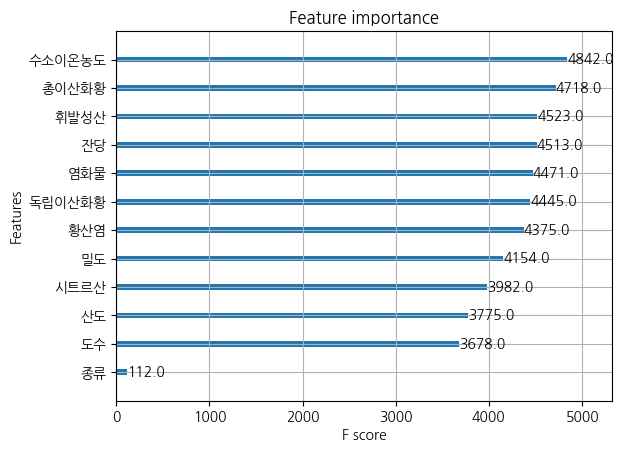

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(model)
plt.show()

## LightGBM
- 대용량 데이터 처리에 적합
- 다른 GBM 계열의 알고리즘보다 메모리를 적게 사용하고 학습속도가 빠름
- 하지만 데이터 수가 너무 적을 때는 과적합 문제를 일으키기도 한다.
- XGBoost 보다 학습에 걸리는 시간이 적음
- 일반적인 트리 계열 알고리즘과 다르게 LightGBM은 리프 중심 트리 분할을 사용
    - 리프 중심 트리 분할 방식은 트리의 균형을 맞추지 않고, 최대 손실 값을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성

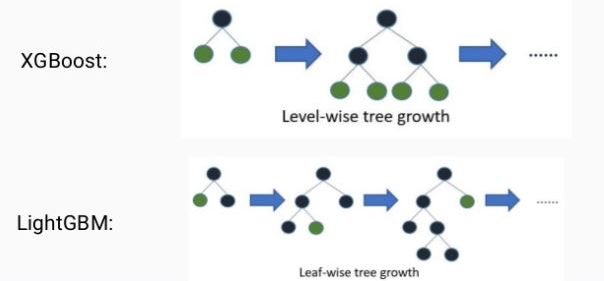

- 분류, 회귀 모두 사용가능
- https://lightgbm.readthedocs.io/en/latest/index.html
- 주피터 노트북 환경에서 설치 방법
```python
!pip install lightgbm
```
- LGBMClassifier 주요 파라미터
    - random_state
        - 시드값
    - n_estimators
        - 부스팅 단계수, 기본값은 100
    - learning_rate
        - 학습률, 기본값은 0.1
    - objective
        - 학습 문제 정의
        - 이진분류는 'binary' , 다중분류는 'multiclass'
        - https://lightgbm.readthedocs.io/en/latest/Parameters.html#core-parameters
    - 그 외 다양한 파라미터가 있다. 다음 문서를 참고
        - https://lightgbm.readthedocs.io/en/latest/Parameters.html
- 학습 제어 주요 파라미터
    - eval_set
        - 검증 데이터를 넣는다
        - 검증셋을 튜플에 담고 튜플을 리스트에 담아 전달
    - eval_metric
        - 검증셋에 대한 평가지표
        - https://lightgbm.readthedocs.io/en/latest/Parameters.html#metric-parameters
    - early_stopping_rounds
        - 조기 종료 조건
        - 예시로 50을 넣었을 경우 검증셋에 평가과정에서 연속으로 50번 개선이 없을 경우 부스팅 중단

In [ ]:
from lightgbm import LGBMClassifier

params ={
    "random_state" : 42,
    "objective" : 'multiclass',
    'n_estimators': 300, # 수행할 부스팅 단계의 수
    'learning_rate' : 0.1,
    'n_jobs' : -1
}
model = LGBMClassifier(**params)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='accuracy',n_jobs = -1)
print(scores) # 폴드별 검증점수 리스트
np.mean(scores) # cv 평균 점수

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[0.64615385 0.65384615 0.65832531 0.6506256  0.64870067]


0.6515303176130895

- 피쳐 중요도 시각화

In [ ]:
model = LGBMClassifier(**params)
model.fit(train_ft,target)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1533
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] Start training from score -5.377783
[LightGBM] [Info] Start training from score -3.402545
[LightGBM] [Info] Start training from score -1.111588
[LightGBM] [Info] Start training from score -0.828742
[LightGBM] [Info] Start training from score -1.795422
[LightGBM] [Info] Start training from score -3.493242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

LGBMClassifier(n_estimators=300, n_jobs=-1, objective='multiclass',
               random_state=42)

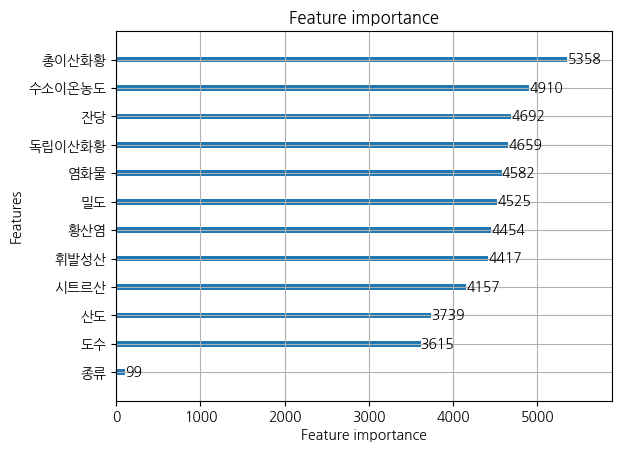

In [ ]:
from lightgbm import plot_importance
plot_importance(model)
plt.show()

## catboost
- 범주형 변수에 강력한 성능을 보여주는 부스팅 모델
- 범주형 변수가 많을경우 높은 성능과 함께 학습 속도가  개선된다.
- 수치형 변수가 대부분일 때는 매우 느리다.
- 범주형 변수를 인코딩 하지 않고 넣어도 된다.
    - 내부적으로 Ordered Target Encoding, One-hot Encoding 방식으로 범주형 변수를 인코딩
    - Target Encoding는 해당 범주를 타겟값의 평균으로 인코딩하는 방법으로 타겟을 피쳐로 사용하게 되는 과적합 문제가 있음
    - catboost는 자체적으로 데이터셋에 시계열을 부여한다. Ordered Target Encoding은 과거 샘플 까지의 데이터를 이용해 현재의 범주를 인코딩하는 방식

- Target Encoding 예시

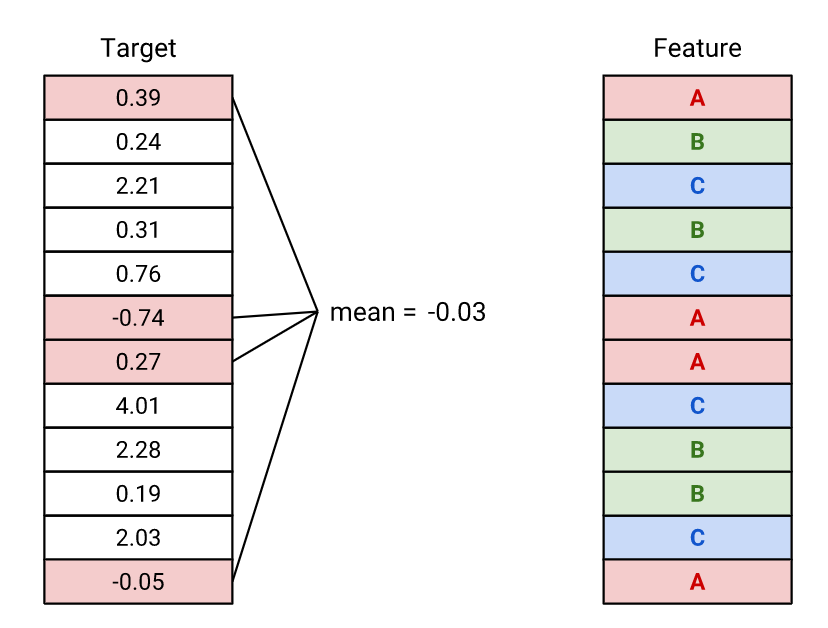

- https://catboost.ai/en/docs/
- 주피터 노트북 환경에서 설치 방법
```python
!pip install catboost
```
- CatBoostClassifier 주요 파라미터
    - random_state
        - 시드값
    - iterations
        - 부스팅 단계수, 기본값은 100
    - loss_function
        - 학습 문제 정의
        - https://catboost.ai/en/docs/concepts/loss-functions
    - eval_metric
        - 검증셋에 대한 평가지표
        - https://catboost.ai/en/docs/concepts/loss-functions
    - cat_features
        - 범주형 컬럼들을 리스트에 담아 넣는다.
    - one_hot_max_size
        - 범주형 변수의 고유값이 이 파라미터수 이하이면 원핫 인코딩을 한다.
    
- 학습 제어 주요 파라미터
    - eval_set
        - 검증 데이터를 넣는다
        - 검증셋을 튜플에 담고 튜플을 리스트에 담아 전달
    - early_stopping_rounds
        - 조기 종료 조건
        - 예시로 50을 넣었을 경우 검증셋에 평가과정에서 연속으로 50번 개선이 없을 경우 부스팅 중단

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

params ={
    "random_state" : 42,
    'n_estimators': 300, # 수행할 부스팅 단계의 수
    "loss_function" : "MultiClass",
}
model = CatBoostClassifier(**params)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='accuracy',n_jobs = -1)
print(scores) # 폴드별 검증점수 리스트
np.mean(scores) # cv 평균 점수

[0.65096154 0.63846154 0.6506256  0.59961501 0.61886429]


0.6317055970978012

- CatBoost 모델의 인코딩 활용해서 학습해보기

In [ ]:
train.head()

,산도,휘발성산,시트르산,잔당,염화물,독립이산화황,총이산화황,밀도,수소이온농도,황산염,도수,종류,품질
0,6.8,0.30,0.27,11.6,0.028,22.0,97.0,0.99314,2.96,0.38,11.7,white,3
1,7.2,0.50,0.00,0.8,0.034,46.0,114.0,0.99320,3.19,0.34,9.2,white,1
2,6.6,0.54,0.21,16.3,0.055,41.0,182.0,0.99860,3.35,0.54,10.4,white,3
3,7.5,0.29,0.67,8.1,0.037,53.0,166.0,0.99660,2.90,0.41,8.9,white,3
4,6.5,0.17,0.33,1.4,0.028,14.0,99.0,0.99280,3.23,0.55,10.1,white,3


In [ ]:
train_ft = train.iloc[:,:-1].copy()
train_ft.head()

,산도,휘발성산,시트르산,잔당,염화물,독립이산화황,총이산화황,밀도,수소이온농도,황산염,도수,종류
0,6.8,0.30,0.27,11.6,0.028,22.0,97.0,0.99314,2.96,0.38,11.7,white
1,7.2,0.50,0.00,0.8,0.034,46.0,114.0,0.99320,3.19,0.34,9.2,white
2,6.6,0.54,0.21,16.3,0.055,41.0,182.0,0.99860,3.35,0.54,10.4,white
3,7.5,0.29,0.67,8.1,0.037,53.0,166.0,0.99660,2.90,0.41,8.9,white
4,6.5,0.17,0.33,1.4,0.028,14.0,99.0,0.99280,3.23,0.55,10.1,white


In [ ]:
params ={
    "random_state" : 42,
    'n_estimators': 300, # 수행할 부스팅 단계의 수
    "loss_function" : "MultiClass",
    "cat_features" : ["종류"],
    "one_hot_max_size" : 1
}
model = CatBoostClassifier(**params)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='accuracy',n_jobs = -1)
print(scores) # 폴드별 검증점수 리스트
np.mean(scores) # cv 평균 점수

[0.63557692 0.63365385 0.62367661 0.59576516 0.61308951]


0.6203524098615533